In [170]:
import pandas as pd
import numpy as np
from algorithm_search.preprocess import prep_airlines, prep_income, prep_phishing, prep_surgical
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import os
#os.chdir('./algorithm_search/')

X_income, y_income = prep_income()
X_airline, y_airline = prep_airlines()
X_phish, y_phish = prep_phishing()
X_surg, y_surg = prep_surgical()

## Table 1 info

In [27]:
X_airline.shape, X_income.shape, X_phish.shape, X_surg.shape

((103594, 22), (41451, 63), (11054, 30), (14635, 24))

In [28]:
X_airline.shape[0] - 5000

98594

In [29]:
X_income.shape[0] - 5000

36451

In [30]:
X_phish.shape[0] - 5000

6054

In [31]:
X_surg.shape[0] - 5000

9635

In [32]:
n = len(np.where(y_airline == 0)[0])
n / len(y_airline)

0.5666061741027473

In [33]:
n = len(np.where(y_income == 0)[0])
n / len(y_income)

0.7519480832790524

In [34]:
n = len(np.where(y_phish == 0)[0])
n / len(y_phish)

0.4430070562692238

In [35]:
n = len(np.where(y_surg == 0)[0])
n / len(y_surg)

0.7478647078920396

## Table 2 

algorithm x dataset

In [44]:
lr_train = pd.read_csv('results/logreg_results_train.csv', index_col=0)
lr_test = pd.read_csv('results/logreg_results_test.csv', index_col=0)
svm_train = pd.read_csv('results/svm_results_train.csv', index_col=0)
svm_test = pd.read_csv('results/svm_results_test.csv', index_col=0)
rf_train = pd.read_csv('results/rf_results_train.csv', index_col=0)
rf_test = pd.read_csv('results/rf_results_test.csv', index_col=0)
ann_train = pd.read_csv('results/ann_results_train.csv', index_col=0)
ann_test = pd.read_csv('results/ann_results_test.csv', index_col=0)

In [56]:
table_2_train = np.zeros((4,5))

for i,alg in enumerate([lr_train, svm_train, rf_train, ann_train]):
    mets = np.array(alg)[:,:-1]
    mean_mets = np.mean(mets, axis=1).reshape(1,4)
    table_2_train[i,:4] = mean_mets
    
table_2_train[:,4] = np.mean(table_2_train[:,:4], axis=1)

In [57]:
table_2_train

array([[0.78532093, 0.56187242, 0.94523035, 0.58117458, 0.71839957],
       [0.80029956, 0.73328797, 0.98935023, 0.85389406, 0.84420796],
       [0.99819647, 0.98091325, 0.9926343 , 0.99610288, 0.99196172],
       [0.69965221, 0.7115823 , 0.99132843, 0.61602128, 0.75464605]])

In [58]:
table_2_test = np.zeros((4,5))

for i,alg in enumerate([lr_test, svm_test, rf_test, ann_test]):
    mets = np.array(alg)[:,:-1]
    mean_mets = np.mean(mets, axis=1).reshape(1,4)
    table_2_test[i,:4] = mean_mets
    
table_2_test[:,4] = np.mean(table_2_test[:,:4], axis=1)

In [59]:
table_2_test

array([[0.78431453, 0.55473647, 0.94215394, 0.56303711, 0.71106051],
       [0.70096006, 0.52026836, 0.96014051, 0.74434646, 0.73142885],
       [0.93848298, 0.77704953, 0.96726715, 0.81697655, 0.87494405],
       [0.69774028, 0.70034362, 0.95255399, 0.57797221, 0.73215253]])

In [62]:
rf_test

,accuracy,f1,roc_auc,precision,recall,mean
airline,0.944411,0.935172,0.941857,0.946275,0.924700,0.938483
income,0.849694,0.663962,0.766077,0.995702,0.609811,0.777050
phishing,0.960716,0.964874,0.957288,0.959387,0.994071,0.967267
surgical,0.895112,0.766216,0.814938,0.928103,0.680514,0.816977


In [63]:
svm_test

,accuracy,f1,roc_auc,precision,recall,mean
airline,0.739786,0.707335,0.736139,0.638906,0.682634,0.700960
income,0.752552,0.235377,0.512459,0.499344,0.601609,0.520268
phishing,0.951885,0.956070,0.945414,0.951620,0.995714,0.960141
surgical,0.873341,0.717059,0.500000,0.995313,0.636019,0.744346


In [64]:
ann_test

,accuracy,f1,roc_auc,precision,recall,mean
airline,0.728047,0.671186,0.708897,0.748416,0.632155,0.697740
income,0.840533,0.636803,0.751693,0.724965,0.547723,0.700344
phishing,0.948733,0.955483,0.948952,0.952196,0.957405,0.952554
surgical,0.786734,0.458543,0.646918,0.643421,0.354245,0.577972


### Statistical significance for test sets

In [85]:
# airline
best_airline_rf = rf_test.loc['airline'][:-1].tolist()
airline_svm = svm_test.loc['airline'][:-1].tolist()
airline_ann = ann_test.loc['airline'][:-1].tolist()
airline_lr = lr_test.loc['airline'][:-1].tolist()

In [86]:
# rf vs svm
stats.ttest_ind(best_airline_rf, airline_svm)

Ttest_indResult(statistic=12.449192914259614, pvalue=1.6194415581288872e-06)

In [87]:
# rf vs ann
stats.ttest_ind(best_airline_rf, airline_ann)

Ttest_indResult(statistic=11.395826557122035, pvalue=3.1749840347522876e-06)

In [88]:
# rf vs logreg
stats.ttest_ind(best_airline_rf, airline_lr)

Ttest_indResult(statistic=8.532085580020036, pvalue=2.7391617356981673e-05)

In [89]:
# income
best_income = rf_test.loc['income'][:-1].tolist()
income_svm = svm_test.loc['income'][:-1].tolist()
income_ann = ann_test.loc['income'][:-1].tolist()
income_lr = lr_test.loc['income'][:-1].tolist()

In [90]:
# rf vs svm
stats.ttest_ind(best_income, income_svm)

Ttest_indResult(statistic=2.3628697537531855, pvalue=0.04575281114147868)

In [92]:
# rf vs ann
stats.ttest_ind(best_income, income_ann)

Ttest_indResult(statistic=0.9033896854946882, pvalue=0.3927083099934453)

In [93]:
# rf vs lr
stats.ttest_ind(best_income, income_lr)

Ttest_indResult(statistic=1.773723828271581, pvalue=0.1140368893404606)

In [94]:
# phishing
best_phish = rf_test.loc['phishing'][:-1].tolist()
phish_svm = svm_test.loc['phishing'][:-1].tolist()
phish_ann = ann_test.loc['phishing'][:-1].tolist()
phish_lr = lr_test.loc['phishing'][:-1].tolist()

In [95]:
# rf vs svm
stats.ttest_ind(best_phish, phish_svm)

Ttest_indResult(statistic=0.6288752501743755, pvalue=0.5469631435047273)

In [96]:
# rf vs ann
stats.ttest_ind(best_phish, phish_ann)

Ttest_indResult(statistic=2.09272882147117, pvalue=0.06972157806467759)

In [97]:
# rf vs lr 
stats.ttest_ind(best_phish, phish_lr)

Ttest_indResult(statistic=1.558326653710479, pvalue=0.15777259871354024)

In [98]:
# surgical
best_surg = rf_test.loc['surgical'][:-1].tolist()
surg_svm = svm_test.loc['surgical'][:-1].tolist()
surg_ann = ann_test.loc['surgical'][:-1].tolist()
surg_lr = lr_test.loc['surgical'][:-1].tolist()

In [99]:
# rf vs svm
stats.ttest_ind(best_surg, surg_svm)

Ttest_indResult(statistic=0.7423107512374302, pvalue=0.4791246006254969)

In [100]:
# rf vs ann
stats.ttest_ind(best_surg, surg_ann)

Ttest_indResult(statistic=2.701064619348107, pvalue=0.027029438491843454)

In [101]:
# rf vs lr
stats.ttest_ind(best_surg, surg_lr)

Ttest_indResult(statistic=2.562949479852796, pvalue=0.03349291691168115)

### Statistical significance for training setss

In [102]:
# airline
best_airline_rf = rf_train.loc['airline'][:-1].tolist()
airline_svm = svm_train.loc['airline'][:-1].tolist()
airline_ann = ann_train.loc['airline'][:-1].tolist()
airline_lr = lr_train.loc['airline'][:-1].tolist()

In [103]:
# rf vs svm
stats.ttest_ind(best_airline_rf, airline_svm)

Ttest_indResult(statistic=3.8671682059780337, pvalue=0.004760378029445974)

In [104]:
# rf vs ann
stats.ttest_ind(best_airline_rf, airline_ann)

Ttest_indResult(statistic=15.018307485380568, pvalue=3.817163373534694e-07)

In [105]:
# rf vs logreg
stats.ttest_ind(best_airline_rf, airline_lr)

Ttest_indResult(statistic=12.125940247470353, pvalue=1.9798269098822227e-06)

In [106]:
# income
best_income = rf_train.loc['income'][:-1].tolist()
income_svm = svm_train.loc['income'][:-1].tolist()
income_ann = ann_train.loc['income'][:-1].tolist()
income_lr = lr_train.loc['income'][:-1].tolist()

In [107]:
# rf vs svm
stats.ttest_ind(best_income, income_svm)

Ttest_indResult(statistic=1.7137352711054425, pvalue=0.12492665104670503)

In [108]:
# rf vs ann
stats.ttest_ind(best_income, income_ann)

Ttest_indResult(statistic=5.352284449151142, pvalue=0.0006839722672184156)

In [109]:
# rf vs lr
stats.ttest_ind(best_income, income_lr)

Ttest_indResult(statistic=3.89164115783921, pvalue=0.004598562597073443)

In [110]:
# phishing
best_phish = rf_train.loc['phishing'][:-1].tolist()
phish_svm = svm_train.loc['phishing'][:-1].tolist()
phish_ann = ann_train.loc['phishing'][:-1].tolist()
phish_lr = lr_train.loc['phishing'][:-1].tolist()

In [111]:
# rf vs svm
stats.ttest_ind(best_phish, phish_svm)

Ttest_indResult(statistic=0.9502427846173577, pvalue=0.3698091035760622)

In [112]:
# rf vs ann
stats.ttest_ind(best_phish, phish_ann)

Ttest_indResult(statistic=1.2599167043827555, pvalue=0.24320947634734014)

In [113]:
# rf vs lr 
stats.ttest_ind(best_phish, phish_lr)

Ttest_indResult(statistic=3.424268590931132, pvalue=0.00903087536539258)

In [114]:
# surgical
best_surg = rf_train.loc['surgical'][:-1].tolist()
surg_svm = svm_train.loc['surgical'][:-1].tolist()
surg_ann = ann_train.loc['surgical'][:-1].tolist()
surg_lr = lr_train.loc['surgical'][:-1].tolist()

In [115]:
# rf vs svm
stats.ttest_ind(best_surg, surg_svm)

Ttest_indResult(statistic=1.5766453057949261, pvalue=0.15352761995666636)

In [116]:
# rf vs ann
stats.ttest_ind(best_surg, surg_ann)

Ttest_indResult(statistic=5.190748157793245, pvalue=0.0008317492024197335)

In [117]:
# rf vs lr
stats.ttest_ind(best_surg, surg_lr)

Ttest_indResult(statistic=4.52126332435283, pvalue=0.0019466606019259598)

## Table 3

In [129]:
table_3_train = np.zeros((4,6))

for i,alg in enumerate([lr_train, svm_train, rf_train, ann_train]):
    mets = np.array(alg)
    mean_mets = np.mean(mets, axis=0)
    table_3_train[i,:] = mean_mets

In [134]:
np.round(table_3_train, 4)

array([[0.8289, 0.6309, 0.7426, 0.7926, 0.597 , 0.7184],
       [0.9296, 0.7212, 0.7704, 0.9975, 0.8025, 0.8442],
       [0.9931, 0.9982, 0.9791, 0.9948, 0.9947, 0.992 ],
       [0.8428, 0.7088, 0.7854, 0.7908, 0.6455, 0.7546]])

In [130]:
table_3_test = np.zeros((4,6))

for i,alg in enumerate([lr_test, svm_test, rf_test, ann_test]):
    mets = np.array(alg)
    mean_mets = np.mean(mets, axis=0)
    table_3_test[i,:] = mean_mets

In [135]:
np.round(table_3_test, 4)

array([[0.8259, 0.626 , 0.7396, 0.7696, 0.5942, 0.7111],
       [0.8294, 0.654 , 0.6735, 0.7713, 0.729 , 0.7314],
       [0.9125, 0.8326, 0.87  , 0.9574, 0.8023, 0.8749],
       [0.826 , 0.6805, 0.7641, 0.7672, 0.6229, 0.7322]])

### statsitical sig for test sets

In [142]:
# acc
best = rf_test['accuracy'].tolist()
svm = svm_test['accuracy'].tolist()
lr = lr_test['accuracy'].tolist()
ann = ann_test['accuracy'].tolist()

rvsvm = stats.ttest_ind(best, svm)
rvlr = stats.ttest_ind(best, lr)
rvann = stats.ttest_ind(best, ann)

print(rvsvm)
print(rvlr)
print(rvann)

Ttest_indResult(statistic=1.4677394765635452, pvalue=0.1925497595092397)
Ttest_indResult(statistic=2.053493559481379, pvalue=0.08582594228629868)
Ttest_indResult(statistic=1.6244830098269332, pvalue=0.1553984862188664)


In [143]:
# f1
best = rf_test['f1'].tolist()
svm = svm_test['f1'].tolist()
lr = lr_test['f1'].tolist()
ann = ann_test['f1'].tolist()

rvsvm = stats.ttest_ind(best, svm)
rvlr = stats.ttest_ind(best, lr)
rvann = stats.ttest_ind(best, ann)

print(rvsvm)
print(rvlr)
print(rvann)

Ttest_indResult(statistic=1.0702241391627738, pvalue=0.3256699822305916)
Ttest_indResult(statistic=1.3306814953029098, pvalue=0.23162919126439174)
Ttest_indResult(statistic=1.2156404063032311, pvalue=0.2697778449773803)


In [146]:
# roc
best = rf_test['roc_auc'].tolist()
svm = svm_test['roc_auc'].tolist()
lr = lr_test['roc_auc'].tolist()
ann = ann_test['roc_auc'].tolist()

rvsvm = stats.ttest_ind(best, svm)
rvlr = stats.ttest_ind(best, lr)
rvann = stats.ttest_ind(best, ann)

print(rvsvm)
print(rvlr)
print(rvann)

Ttest_indResult(statistic=1.6993424260791226, pvalue=0.1401668392408264)
Ttest_indResult(statistic=1.4714520514465876, pvalue=0.19158088241490406)
Ttest_indResult(statistic=1.3162195369301275, pvalue=0.2361459964820359)


In [147]:
# precision
best = rf_test['precision'].tolist()
svm = svm_test['precision'].tolist()
lr = lr_test['precision'].tolist()
ann = ann_test['precision'].tolist()

rvsvm = stats.ttest_ind(best, svm)
rvlr = stats.ttest_ind(best, lr)
rvann = stats.ttest_ind(best, ann)

print(rvsvm)
print(rvlr)
print(rvann)

Ttest_indResult(statistic=1.5336526007821607, pvalue=0.17600919160515055)
Ttest_indResult(statistic=3.3928212864688017, pvalue=0.014624687808365336)
Ttest_indResult(statistic=2.830576132674246, pvalue=0.0299351034345062)


In [148]:
# recall
best = rf_test['recall'].tolist()
svm = svm_test['recall'].tolist()
lr = lr_test['recall'].tolist()
ann = ann_test['recall'].tolist()

rvsvm = stats.ttest_ind(best, svm)
rvlr = stats.ttest_ind(best, lr)
rvann = stats.ttest_ind(best, ann)

print(rvsvm)
print(rvlr)
print(rvann)

Ttest_indResult(statistic=0.5650853909204204, pvalue=0.5925003312624182)
Ttest_indResult(statistic=0.9998875769181158, pvalue=0.3559678592579835)
Ttest_indResult(statistic=1.1471717142318916, pvalue=0.29498776337246385)


### stats for training

In [149]:
# acc
best = rf_train['accuracy'].tolist()
svm = svm_train['accuracy'].tolist()
lr = lr_train['accuracy'].tolist()
ann = ann_train['accuracy'].tolist()

rvsvm = stats.ttest_ind(best, svm)
rvlr = stats.ttest_ind(best, lr)
rvann = stats.ttest_ind(best, ann)

print(rvsvm)
print(rvlr)
print(rvann)

Ttest_indResult(statistic=1.1693830981325262, pvalue=0.2865976610516648)
Ttest_indResult(statistic=4.763465469174066, pvalue=0.003115269669357184)
Ttest_indResult(statistic=2.7200493869222444, pvalue=0.03464050587947918)


In [150]:
# f1
best = rf_train['f1'].tolist()
svm = svm_train['f1'].tolist()
lr = lr_train['f1'].tolist()
ann = ann_train['f1'].tolist()

rvsvm = stats.ttest_ind(best, svm)
rvlr = stats.ttest_ind(best, lr)
rvann = stats.ttest_ind(best, ann)

print(rvsvm)
print(rvlr)
print(rvann)

Ttest_indResult(statistic=1.6370976235633137, pvalue=0.152724788807879)
Ttest_indResult(statistic=2.6918921591373377, pvalue=0.035961953538427946)
Ttest_indResult(statistic=2.8801108080177285, pvalue=0.02805367402298735)


In [151]:
# roc
best = rf_train['roc_auc'].tolist()
svm = svm_train['roc_auc'].tolist()
lr = lr_train['roc_auc'].tolist()
ann = ann_train['roc_auc'].tolist()

rvsvm = stats.ttest_ind(best, svm)
rvlr = stats.ttest_ind(best, lr)
rvann = stats.ttest_ind(best, ann)

print(rvsvm)
print(rvlr)
print(rvann)

Ttest_indResult(statistic=2.06775924308453, pvalue=0.08414796000010692)
Ttest_indResult(statistic=3.0689208954647484, pvalue=0.021972399317250105)
Ttest_indResult(statistic=2.6787022653363977, pvalue=0.03659940703306447)


In [155]:
# precision
best = svm_train['precision'].tolist()
rf = rf_train['precision'].tolist()
lr = lr_train['precision'].tolist()
ann = ann_train['precision'].tolist()

svmvrf = stats.ttest_ind(best, rf)
svmvlr = stats.ttest_ind(best, lr)
svmvann = stats.ttest_ind(best, ann)

print(svmvrf)
print(svmvlr)
print(svmvann)

Ttest_indResult(statistic=0.7322859133343658, pvalue=0.49159692539674826)
Ttest_indResult(statistic=4.364055486859049, pvalue=0.00474954561453371)
Ttest_indResult(statistic=3.035072197415799, pvalue=0.022947751264892898)


In [156]:
# recall
best = rf_train['recall'].tolist()
svm = svm_train['recall'].tolist()
lr = lr_train['recall'].tolist()
ann = ann_train['recall'].tolist()

rvsvm = stats.ttest_ind(best, svm)
rvlr = stats.ttest_ind(best, lr)
rvann = stats.ttest_ind(best, ann)

print(rvsvm)
print(rvlr)
print(rvann)

Ttest_indResult(statistic=2.148840186069957, pvalue=0.07522661453523748)
Ttest_indResult(statistic=2.1559270752398594, pvalue=0.07449437690178588)
Ttest_indResult(statistic=2.746231807727575, pvalue=0.03345828813524797)


## Hyperparameters

In [165]:
datasets = ['airline', 'income', 'phishing', 'surgical']

### log reg

In [179]:
lr_hyp = pd.read_csv('results/logreg_hyperparameters.csv', index_col=0)

In [180]:
lr_hyp_air = lr_hyp.iloc[:13]
lr_hyp_in = lr_hyp.iloc[13:26]
lr_hyp_phish = lr_hyp.iloc[26:39]
lr_hyp_surg = lr_hyp.iloc[39:]

In [183]:
logreg_hyperparams = [lr_hyp_air, lr_hyp_in, lr_hyp_phish, lr_hyp_surg]

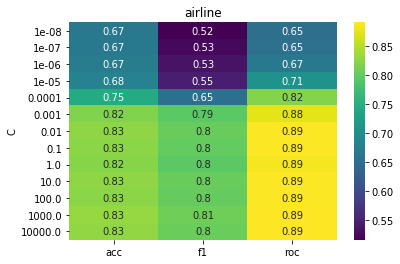

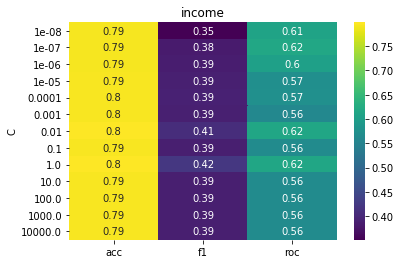

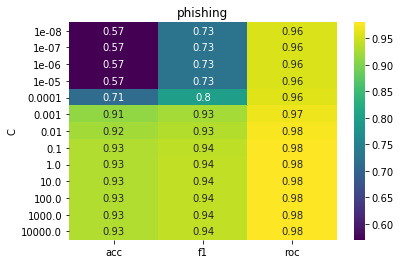

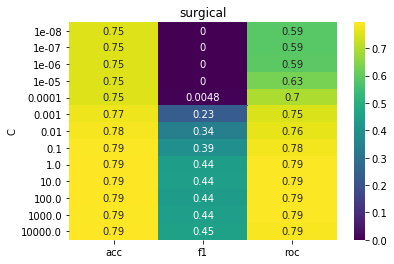

In [184]:
# to visualize hyperparameter search results
for i,hyp in enumerate(logreg_hyperparams):
    sns.heatmap(hyp, annot=True, cmap='viridis')
    plt.title(datasets[i])
    plt.show()

### random forest

In [195]:
rf_hyp = pd.read_csv('results/rf_hyperparameters.csv', index_col=0).reset_index()

In [200]:
rf_hyp_air = rf_hyp.iloc[:64]
rf_hyp_in = rf_hyp.iloc[64:128]
rf_hyp_phish = rf_hyp.iloc[128:192]
rf_hyp_surg = rf_hyp.iloc[192:]

In [204]:
rf_hyperparams = [rf_hyp_air, rf_hyp_in, rf_hyp_phish, rf_hyp_surg]

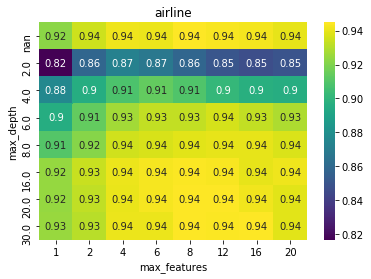

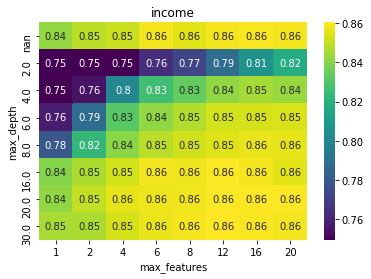

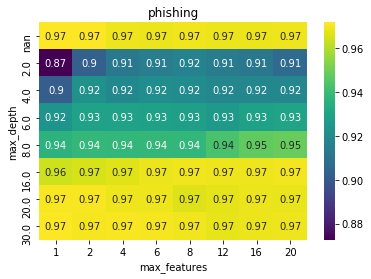

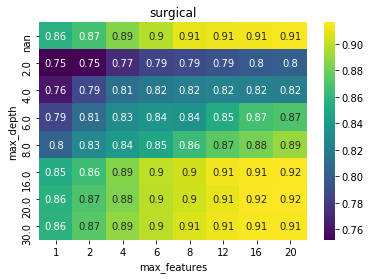

In [209]:
for i,hyp in enumerate(rf_hyperparams):
    sns.heatmap(hyp.pivot('max_depth', 'max_features', 'acc'), annot=True, cmap='viridis')
    plt.title(datasets[i])
    plt.show()

### ann

In [212]:
ann_hyp = pd.read_csv('results/ann_hyperparameters.csv', index_col=0).reset_index()

In [214]:
ann_hyp_air = ann_hyp.iloc[:48]
ann_hyp_in = ann_hyp.iloc[48:96]
ann_hyp_phish = ann_hyp.iloc[96:144]
ann_hyp_surg = ann_hyp.iloc[144:]

In [217]:
ann_hyperparams = [ann_hyp_air, ann_hyp_in, ann_hyp_phish, ann_hyp_surg]

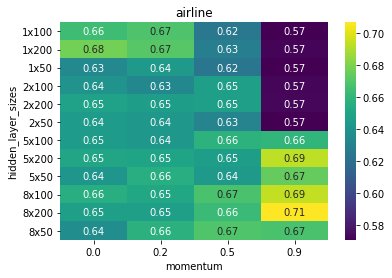

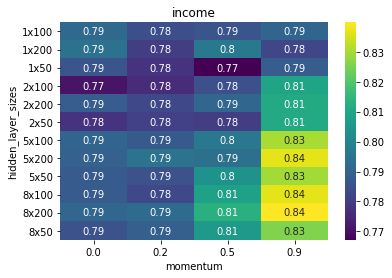

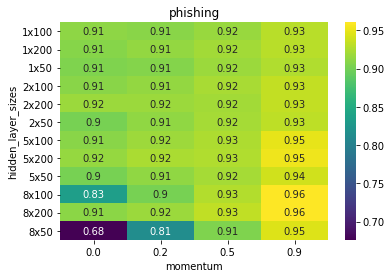

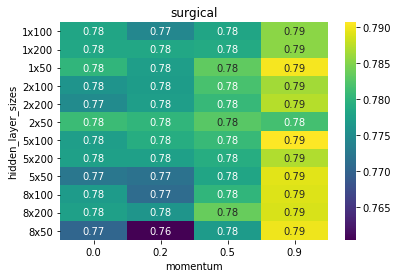

In [220]:
for i,hyp in enumerate(ann_hyperparams):
    sns.heatmap(hyp.pivot('hidden_layer_sizes', 'momentum', 'acc'), annot=True, cmap='viridis')
    plt.title(datasets[i])
    plt.show()